# Importing Packages

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.5.0'

# Utility Function

In [4]:
def plotSeries(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label = label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

# Trend, Seasonality, Noise and Auto-correlation

In [5]:
def trend(time, slope=0):
    return slope * time

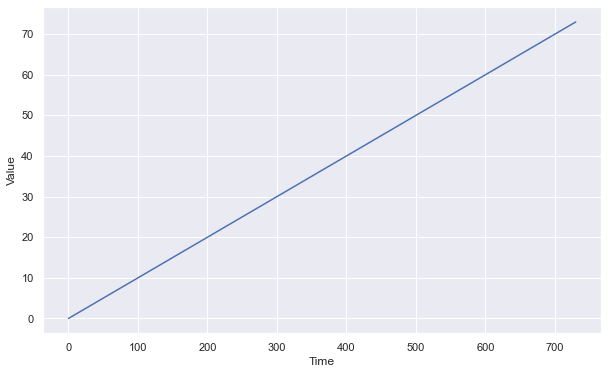

In [6]:
''' A time series that trends upwards '''

time = np.arange(2 * 365 + 1)
series = trend(time, 0.1)

plt.figure(figsize=(10, 6))
plotSeries(time, series)
plt.show()

In [8]:
""" Time Series with Seasonality"""

def seasonalPattern(seasonTime):
    """ A random Pattern"""
    return np.where(seasonTime < 0.1, 
                    np.sin(seasonTime * 2 * np.pi), 
                    1/np.exp(3*seasonTime))

def seasonality(time, period, amplitude = 1, phase= 0):
    """ Repeatation at each period"""
    seasonTime = ((time + phase) % period) / period
    return amplitude * seasonalPattern(seasonTime)
    

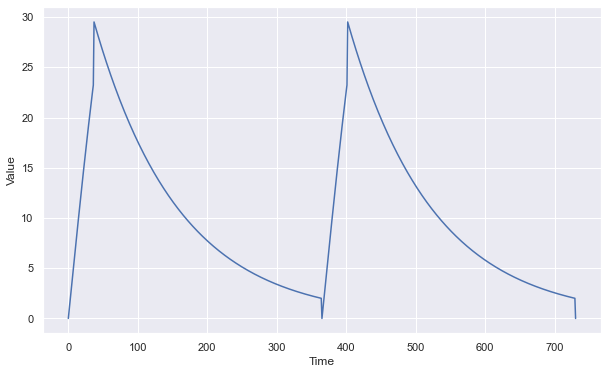

In [9]:
amplitude = 40
series = seasonality(time, period=365, amplitude=amplitude)

plt.figure(figsize=(10, 6))
plotSeries(time, series)
plt.show()

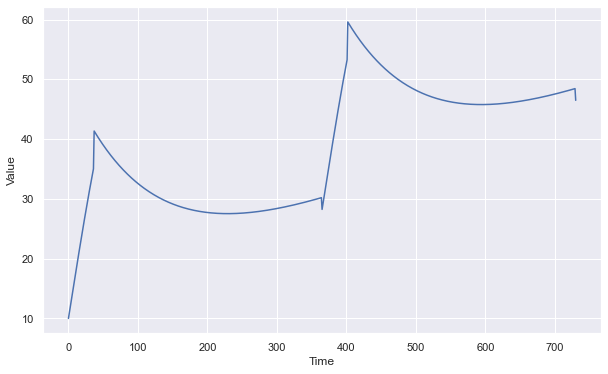

In [10]:
""" Time Series with both Trend and Seasonality"""
slope = 0.05
baseline = 10
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

plt.figure(figsize=(10, 6))
plotSeries(time, series)
plt.show()

In [11]:
def whiteNoise(time, noiseLevel = 1, seed=99):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noiseLevel

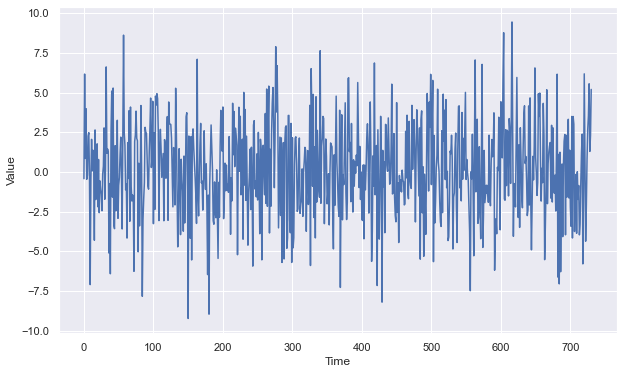

In [12]:
"""randn generates samples from the normal distribution, while numpy. random. rand from a uniform distribution (in the range [0,1))."""

noiseLevel = 3
noise = whiteNoise(time, noiseLevel, seed=99)

plt.figure(figsize=(10, 6))
plotSeries(time, noise)
plt.show()

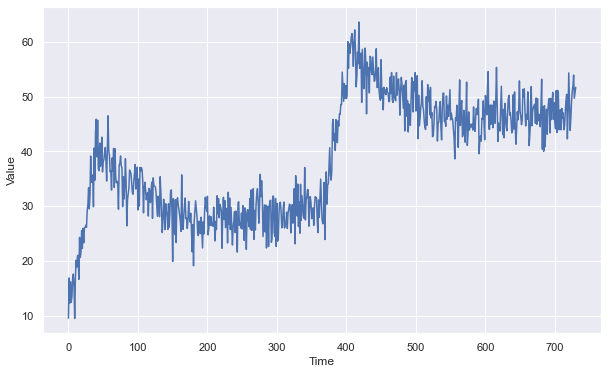

In [13]:
# The Series with the white Noise
series += noise

plt.figure(figsize=(10, 6))
plotSeries(time, series)
plt.show()

In [17]:
def autoCorrelation(time, amplitude, seed=None):
    rnd = np.random.RandomState(seed)
    phi = 0.8
    ar = rnd.randn(len(time) + 1)
    for step in range(1, len(time)+1):
        ar[step] += phi * ar[step - 1]
    return ar[1:] * amplitude

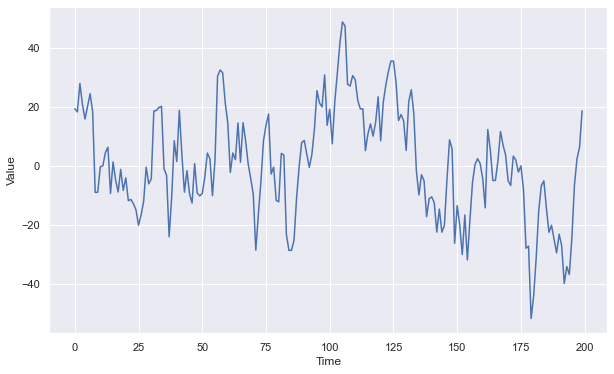

In [28]:
plt.figure(figsize=(10, 6))
series = autoCorrelation(time, 10, seed=99)
plotSeries(time[:200], series[:200])
plt.show()

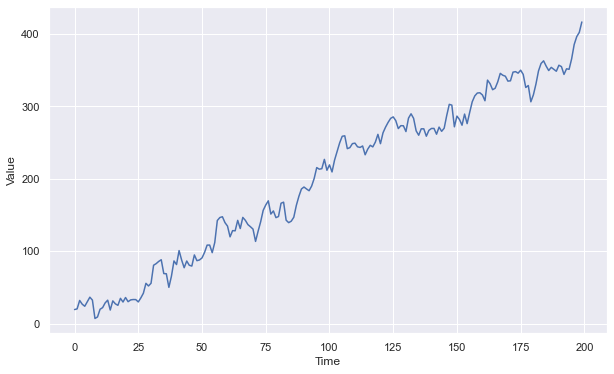

In [31]:
plt.figure(figsize=(10, 6))
series = autoCorrelation(time, 10, seed=99) + trend(time, 2)
plotSeries(time[:200], series[:200])
plt.show()


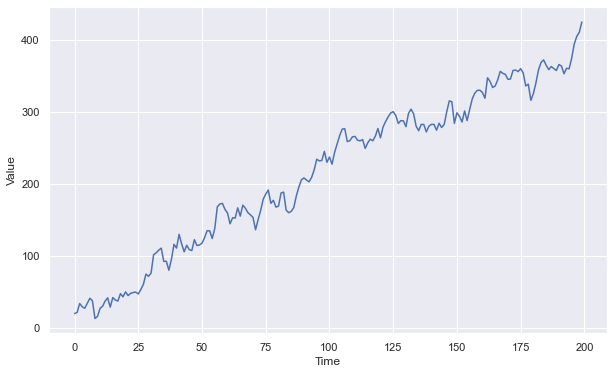

In [35]:
plt.figure(figsize=(10, 6))
series = autoCorrelation(time, 10, seed=99) + trend(time, 2) + seasonality(time, period = 365, amplitude = 40)
plotSeries(time[:200], series[:200])
plt.show()

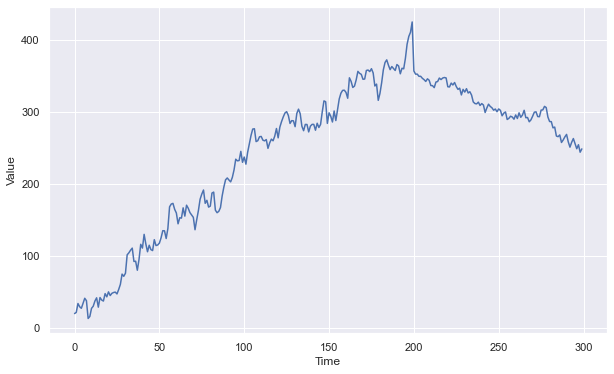

In [36]:
plt.figure(figsize=(10, 6))
series = autoCorrelation(time, 10, seed=99) + trend(time, 2) + seasonality(time, period = 365, amplitude = 40)
series2 = autoCorrelation(time, 5, seed=99) + trend(time, -1) + seasonality(time, period = 365, amplitude = 20) + 550

series[200:] = series2[200:]
#series += noise(time, 30)
plotSeries(time[:300], series[:300])
plt.show()

# Train-Test Split

In [16]:
splitTime = 500
timeTrain = time[:splitTime]
xTrain = series[:splitTime]
timeValid = time[splitTime:]
xValid = series[splitTime:]